In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df.shape

(8523, 12)

In [7]:
df_test.shape

(5681, 11)

In [8]:
len(df['Item_Identifier'].unique())

1559

In [9]:
len(df_test['Item_Identifier'].unique())

1543

In [10]:
# checking the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# checking the null values
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<AxesSubplot:>

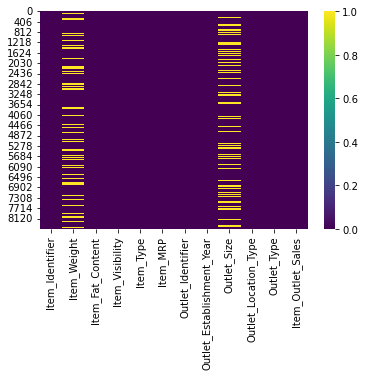

In [14]:
sns.heatmap(df.isnull(),cmap='viridis')

There is null values in item_weight and outlate size. The item_weight is float type data so its null value will be replaced by mean and outlate_type is string object so its null value will be replaced by mode value

<AxesSubplot:>

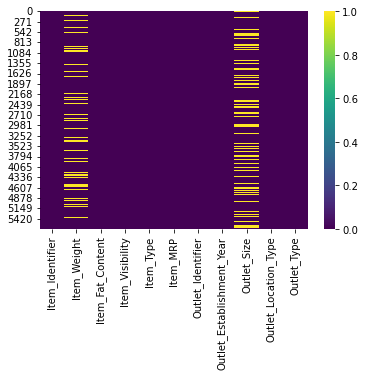

In [15]:
sns.heatmap(df_test.isnull(),cmap='viridis')

In [16]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
#cheching the categorical values
obj_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_col.append(i)

obj_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

We dont require the Item Identifier and the outlet Indetifier , so we will remove it

In [18]:
obj_col.remove('Item_Identifier')
obj_col.remove('Outlet_Identifier')

In [19]:
#checking the unique columns in object cols
for i in obj_col:
    print(i)
    print(df[i].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

We can observe 'Item_Fat_Content' has similar column name (i) Regular abd reg (ii) Low Fat and LF (iii) low fat and Low Fat we can merge the both of them respectively

In [20]:
#cheching the categorical values
obj_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=='object':
        obj_col.append(i)

obj_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [21]:
obj_col.remove('Item_Identifier')
obj_col.remove('Outlet_Identifier')

In [22]:
#checking the unique columns in object cols
for i in obj_col:
    print(i)
    print(df_test[i].value_counts())
    print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [23]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Found different weight mean for different Item_itedifier

In [24]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [26]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [27]:
df['Item_Weight'].isnull().sum()

0

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [29]:
#fill the missing values
item_weight_mean2 = df_test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean2

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [30]:
miss_bool2 = df_test['Item_Weight'].isnull()
miss_bool2

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

Replace all null values in Item_Weight with mean

In [31]:
len(df_test['Item_Weight'])

5681

In [32]:
for i, item in enumerate(df_test['Item_Identifier']):
    if miss_bool2[i]:
        if item in item_weight_mean:
            df_test['Item_Weight'][i] = item_weight_mean2.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i] = np.mean(df_test['Item_Weight'])

In [33]:
outlate_size_mode=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))
outlate_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [34]:
def fill_outletsize(cols):
    o_size=cols[0]
    o_type=cols[1]
    if pd.isnull(o_size):
        if o_type=='Grocery Store':
            return 'Small'
        elif o_type=='Supermarket Type1':
            return 'Small'
        elif o_type=='Supermarket Type2':
            return 'Medium'
        elif o_type=='Supermarket Type3':
            return 'Medium'
    else:
        return o_size

In [35]:
df['Outlet_Size']=df[['Outlet_Size','Outlet_Type']].apply(fill_outletsize,axis=1)

In [36]:
outlate_size_mode=df_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))
outlate_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
df_test['Outlet_Size']=df_test[['Outlet_Size','Outlet_Type']].apply(fill_outletsize,axis=1)

In [38]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [40]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


using the describe functin we can find the Item_Visibilty has the Zero values

In [41]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [42]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [43]:
sum(df['Item_Visibility']==0)

526

In [44]:
sum(df_test['Item_Visibility']==0)

353

526 values are 0

In [45]:
#replacig the item_visibity '0' vaulues with mean
mean_visibility = df['Item_Visibility'].mean(skipna=True)

df['Item_Visibility']=df.Item_Visibility.mask(df.Item_Visibility == 0,mean_visibility)
sum(df['Item_Visibility']==0)

0

In [46]:
#replacig the item_visibity '0' vaulues with mean
mean_visibility = df_test['Item_Visibility'].mean(skipna=True)

df_test['Item_Visibility']=df_test.Item_Visibility.mask(df_test.Item_Visibility == 0,mean_visibility)
sum(df_test['Item_Visibility']==0)

0

Replaced the 0 values with mean

In [47]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Rgular':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Rgular':'Regular'})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [49]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [50]:
df_test['New_Item_Type'] = df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [51]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [52]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [53]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [54]:
df_test.loc[df_test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [55]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [56]:
# create small values for establishment year
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']

# EDA

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


Using the sources I decoded that the item prefix letters in Item_Identifier (i) FD represent FOOD (ii) DR represent Drink (iii) NC represent Non Consumable

In [58]:
df['Item_Code']=df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Code'].head(10)

0    FD
1    DR
2    FD
3    FD
4    NC
5    FD
6    FD
7    FD
8    FD
9    FD
Name: Item_Code, dtype: object

In [59]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Identifier']=df['Item_Identifier'].replace({'FD':'Food','DR':'Drink','NC':'Non Consumable'})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Item_Code
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,FD
1,Drink,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4,DR
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,FD
3,Food,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,FD
4,Non Consumable,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26,NC


In [60]:
df_test['Item_Code']=df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['Item_Code'].head(10)

0    FD
1    FD
2    NC
3    FD
4    FD
5    FD
6    FD
7    FD
8    FD
9    FD
Name: Item_Code, dtype: object

Strip the Item Identifier for first two digit and encoded for (i) FD as Food (ii) DR as Drink (iii) NC as Non Consumable

In [61]:
df_test['Item_Identifier']=df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['Item_Identifier']=df_test['Item_Identifier'].replace({'FD':'Food','DR':'Drink','NC':'Non Consumable'})
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Item_Code
0,Food,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,FD
1,Food,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6,FD
2,Non Consumable,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumable,15,NC
3,Food,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6,FD
4,Food,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28,FD


In [62]:
df.drop('Item_Code',axis=1,inplace=True)

In [63]:
df_test.drop('Item_Code',axis=1,inplace=True)

In [64]:
df['Item_Identifier'].value_counts()

Food              6125
Non Consumable    1599
Drink              799
Name: Item_Identifier, dtype: int64

In [65]:
df_test['Item_Identifier'].value_counts()

Food              4076
Non Consumable    1087
Drink              518
Name: Item_Identifier, dtype: int64

In [66]:
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year']-2013
df['Outlet_Establishment_Year']

0      -14
1       -4
2      -14
3      -15
4      -26
        ..
8518   -26
8519   -11
8520    -9
8521    -4
8522   -16
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [67]:
df_test['Outlet_Establishment_Year']=df_test['Outlet_Establishment_Year']-2013
df_test['Outlet_Establishment_Year']

0      -14
1       -6
2      -15
3       -6
4      -28
        ..
5676   -16
5677    -4
5678   -11
5679    -6
5680   -11
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

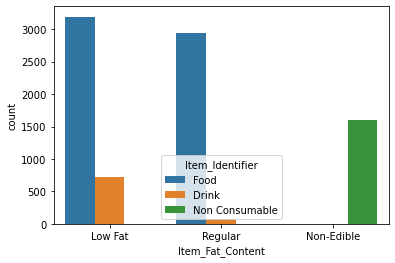

In [68]:
sns.countplot(x='Item_Fat_Content',hue='Item_Identifier',data=df)

low fat content data is more eatable

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

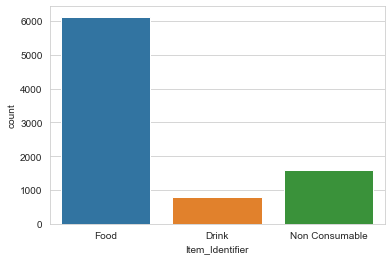

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Item_Identifier',data=df)

Food item are much more than Drink and Non-Consumables

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

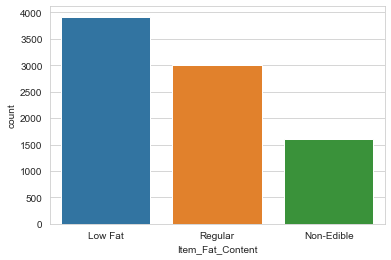

In [70]:
sns.countplot(x='Item_Fat_Content',data=df)

Low fat item are more than Regulat fat item

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

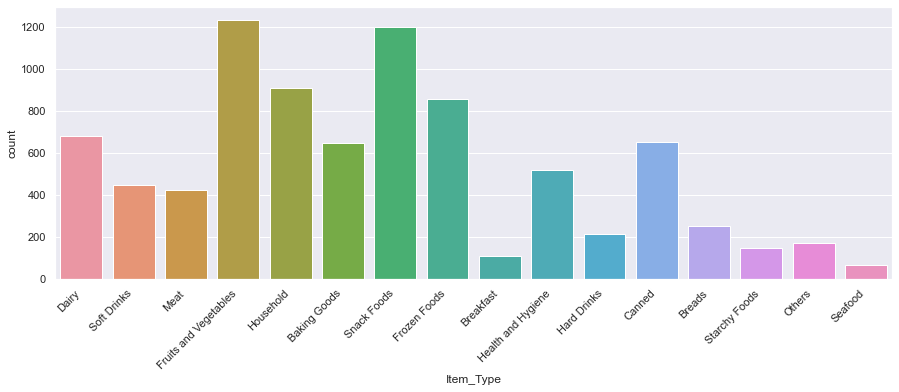

In [71]:
sns.set(rc = {'figure.figsize':(15,5)})

chart=sns.countplot(x='Item_Type',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Fruits and Vegetables , Snack Foods are more in store

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

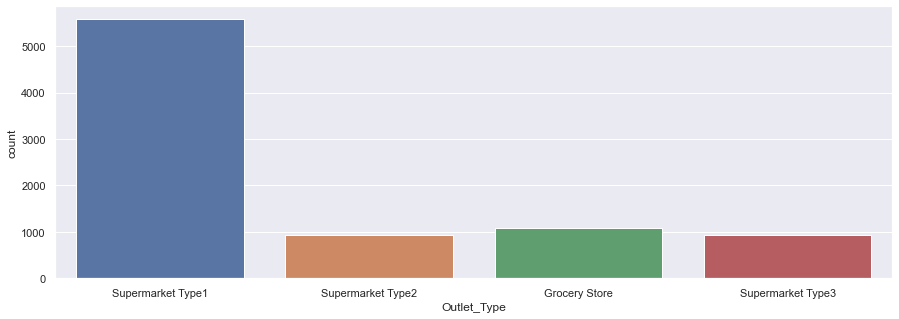

In [72]:
sns.countplot(x='Outlet_Type',data=df)

Supermaket Type1 is much more than the others Outlet Type

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

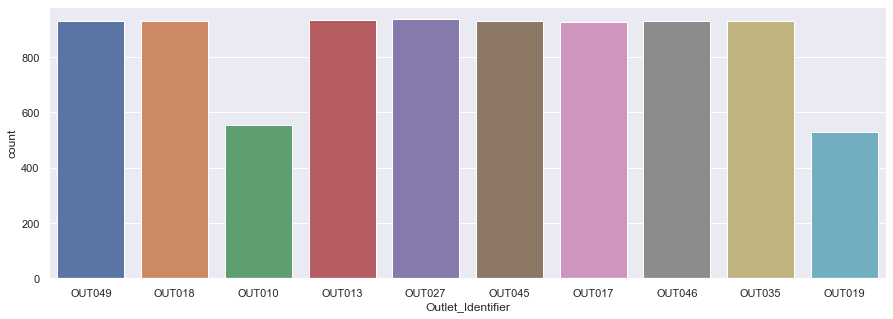

In [73]:
sns.countplot(x='Outlet_Identifier',data=df)

Outlet010 and Outlet019 alre less in numbers

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

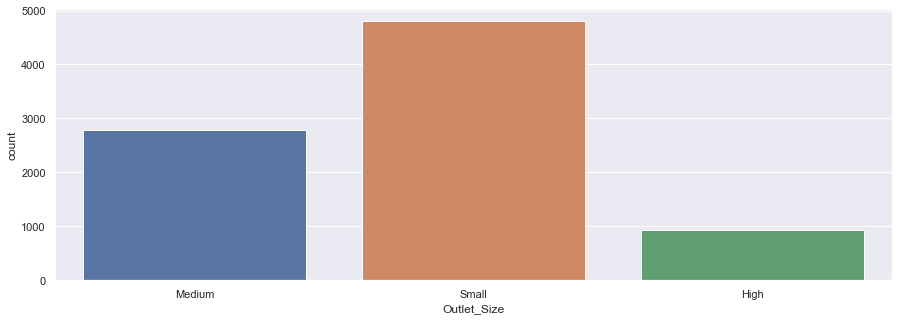

In [74]:
sns.countplot(x='Outlet_Size',data=df)

Small outlet are more in numbers

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

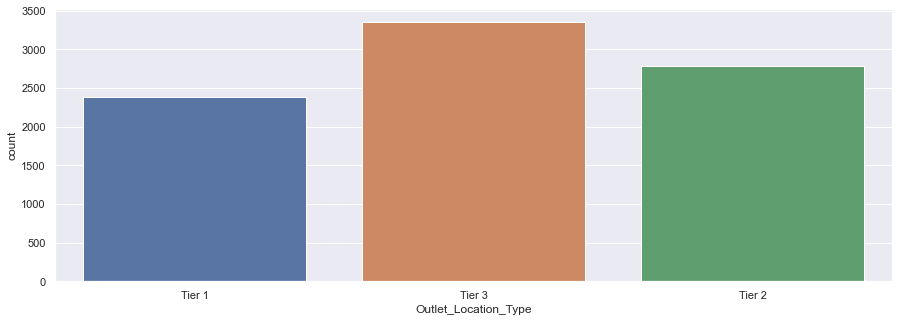

In [75]:
sns.countplot(x='Outlet_Location_Type',data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

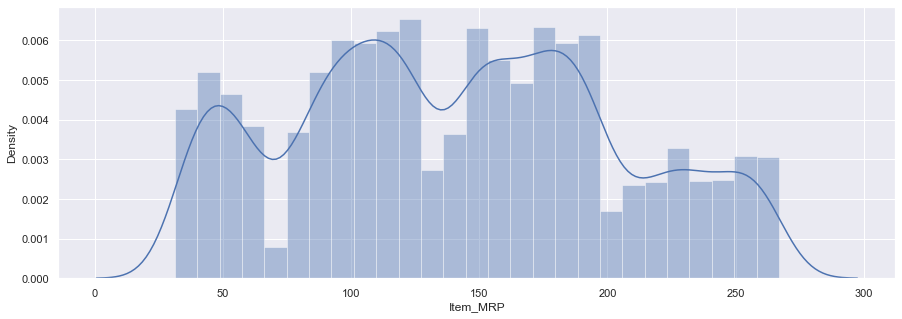

In [76]:
sns.distplot(df['Item_MRP'])

Outlets in Tier3 are more than Tier 2 and Tier 1

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

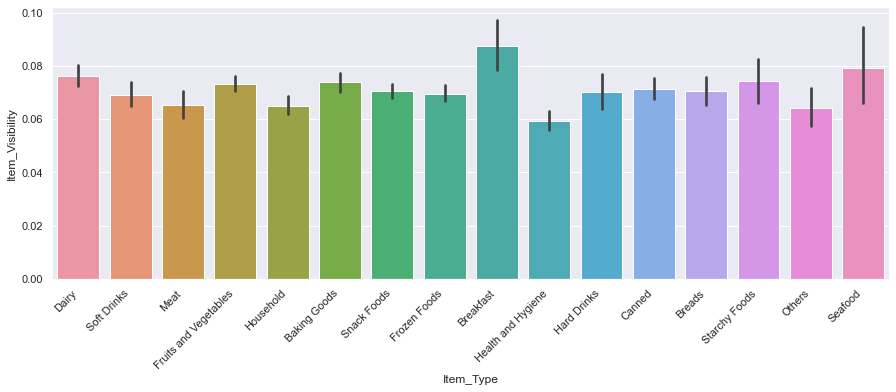

In [77]:
chart=sns.barplot(x='Item_Type',y='Item_Visibility',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Item Visibilty of all the item type is almost same

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

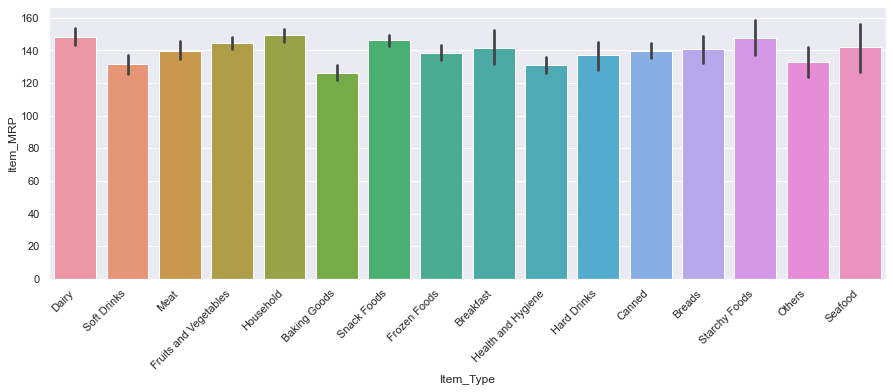

In [78]:
chart=sns.barplot(x='Item_Type',y='Item_MRP',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

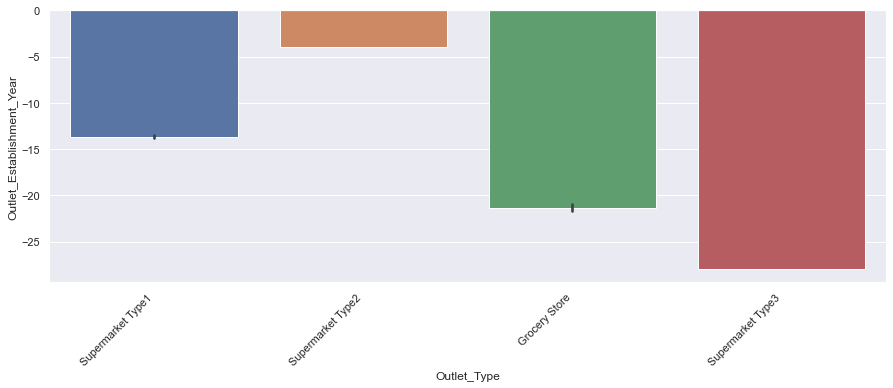

In [79]:
chart=sns.barplot(x='Outlet_Type',y='Outlet_Establishment_Year',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Supermarket Type3 stores are oldest store whereas Supermarket2 are newest

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

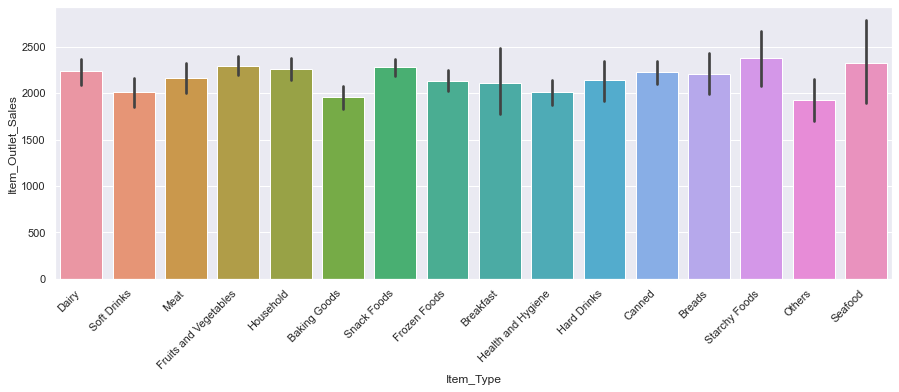

In [80]:
chart=sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

sales of all the items are alomost same

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

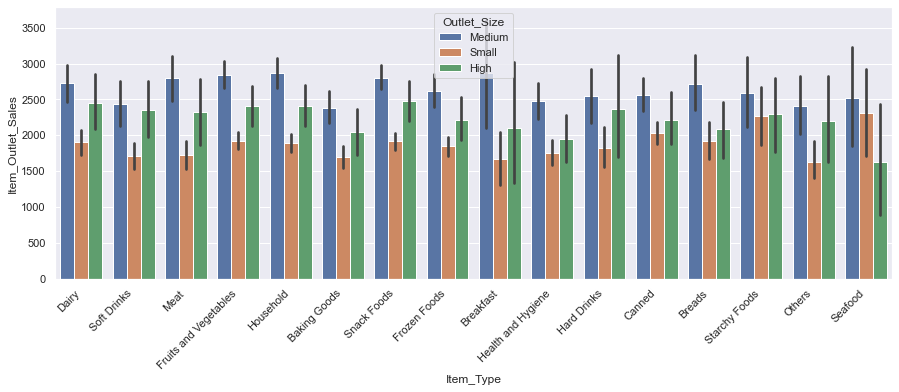

In [81]:
chart=sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Medium size outlet has more sales compare to small and high

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

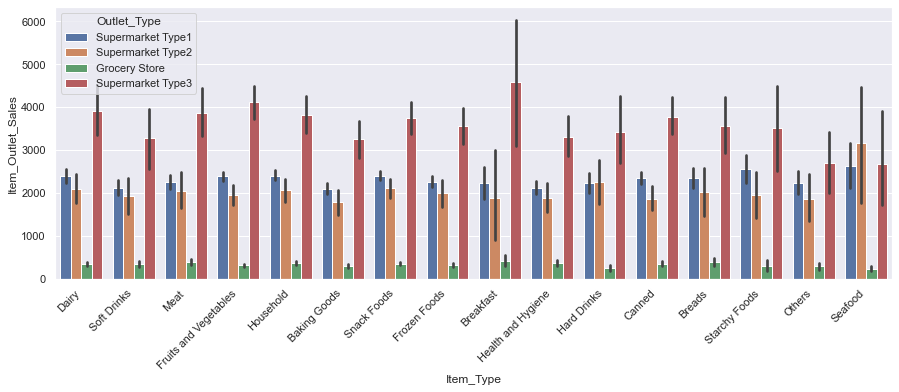

In [82]:
chart=sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

(i) In almost all type of Supermarket Type3 all the items sales are high

(ii) Seafood is sales is more in Supermarket Type2

(iii) In Grocery store all the items sales are much less , need to improvise



[Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')]

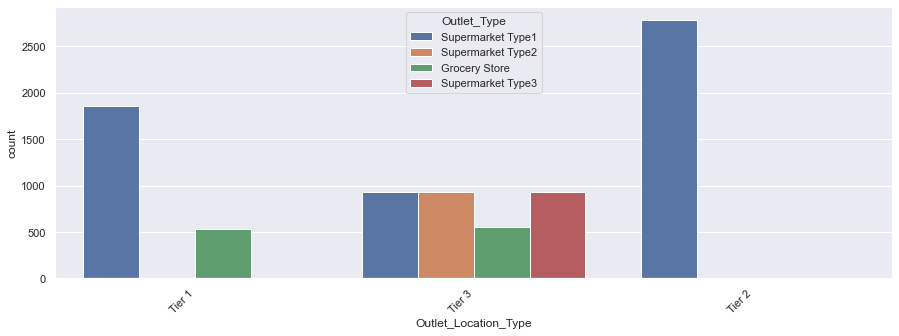

In [83]:
chart=sns.countplot(x='Outlet_Location_Type',hue='Outlet_Type',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

(i) There is Supermarket Type 2 and Type 3 in Tier 1 

(ii) Supermarket Type 2, type 3 and Grocery is not available in Tier 2

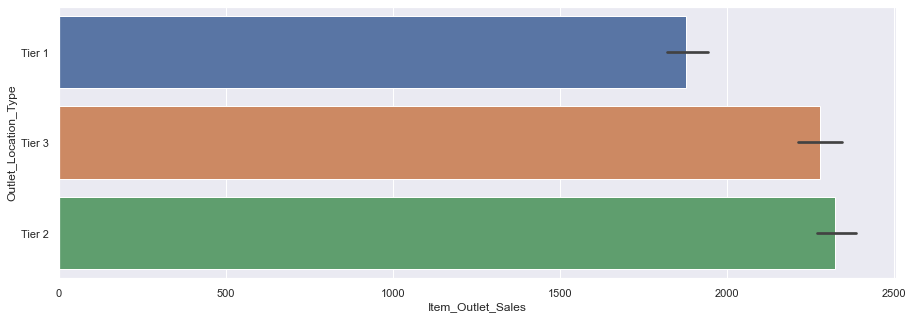

In [84]:
chart=sns.barplot(x='Item_Outlet_Sales',y='Outlet_Location_Type',data=df)

Tier 2 outlet has more sales, Tier 1 outlet has less sales need to improve

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

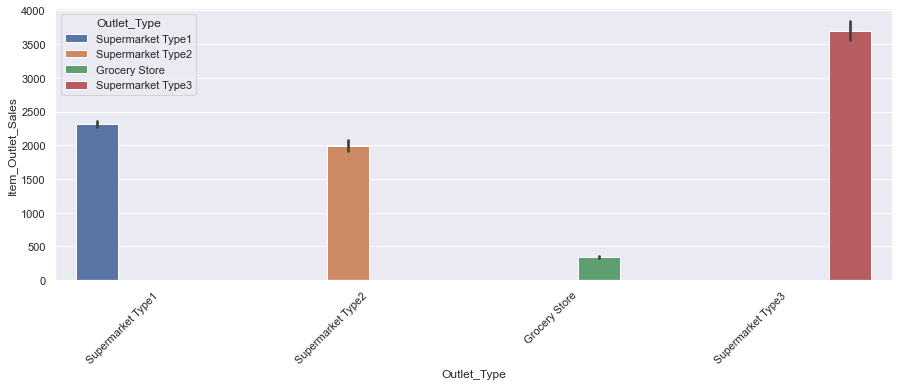

In [85]:
chart=sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

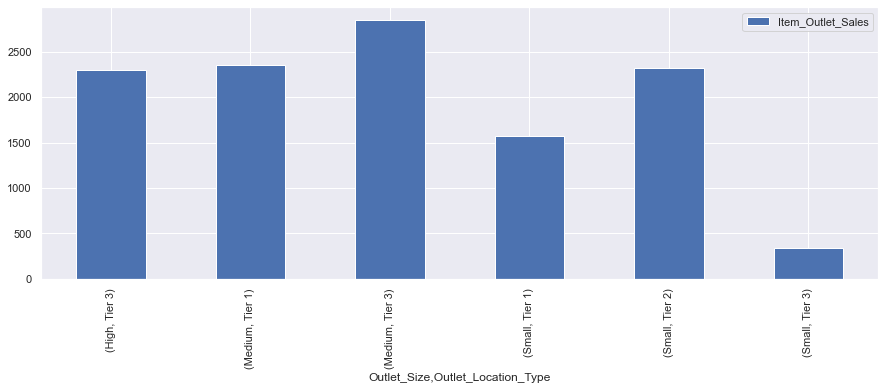

In [87]:
df.groupby(['Outlet_Size','Outlet_Location_Type']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

# Feature Engineering

In [88]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Years                 0.396641
dtype: float64

In [89]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

Removed the skewness using sqrt methon

In [90]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              0.405969
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Years                 0.396641
dtype: float64

In [91]:
df_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.372659
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Years                 0.396306
dtype: float64

In [92]:
df_test['Item_Visibility']=np.sqrt(df_test['Item_Visibility'])

In [93]:
df_test.skew()

Item_Weight                  0.142813
Item_Visibility              0.435375
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Years                 0.396306
dtype: float64

In [94]:
columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

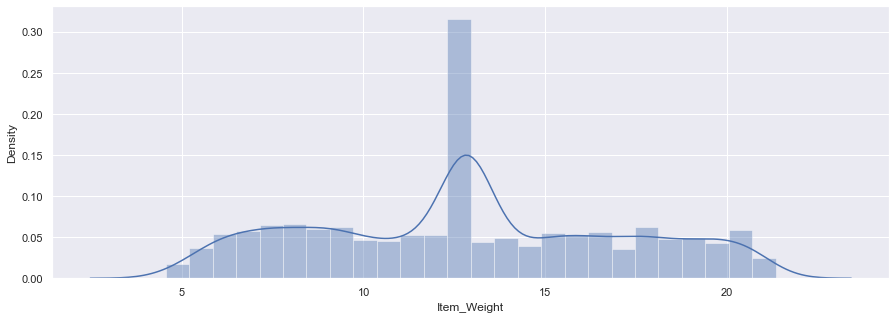

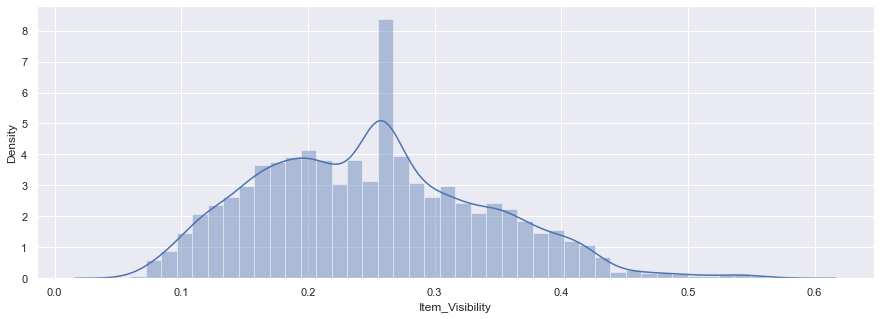

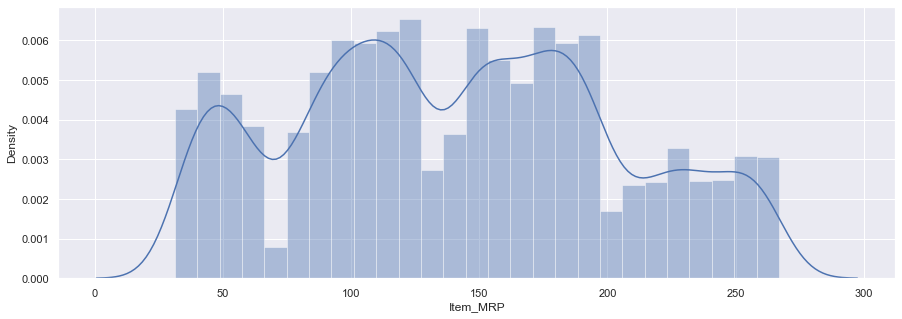

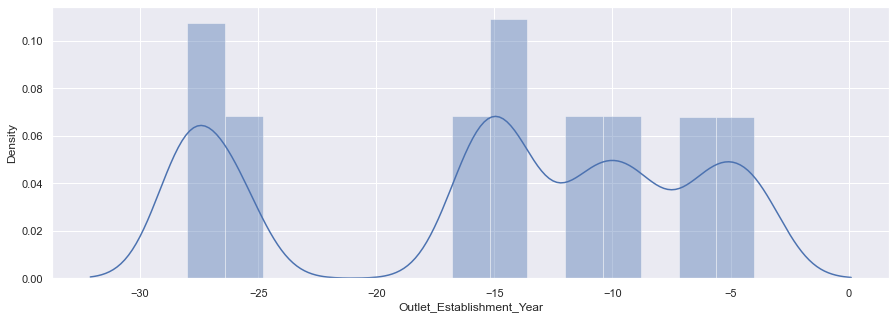

In [95]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

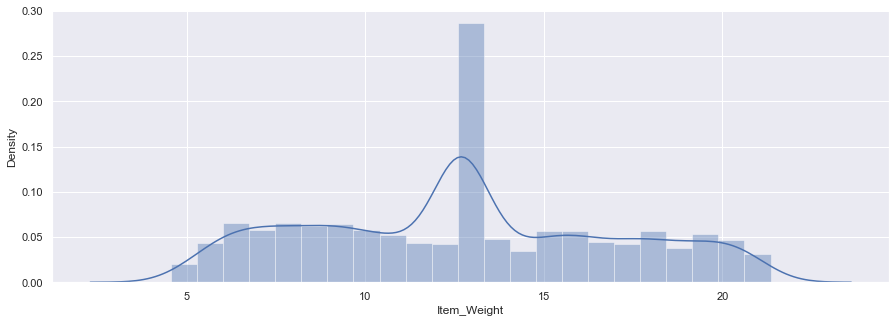

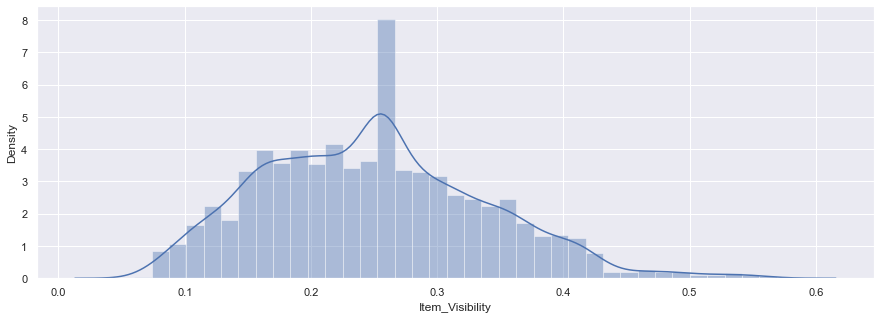

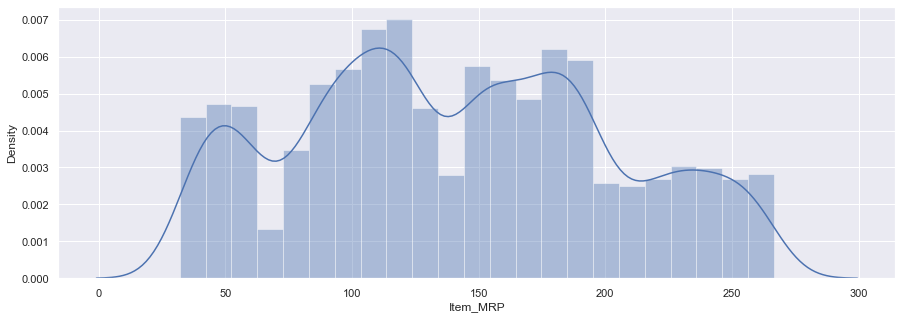

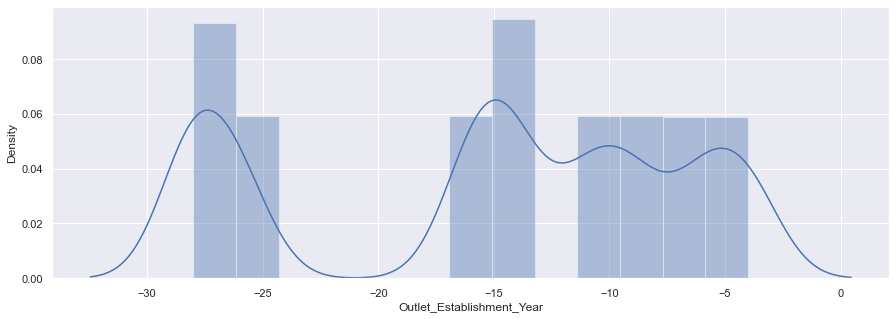

In [96]:
for i in columns:
    sns.distplot(df_test[i])
    plt.show()

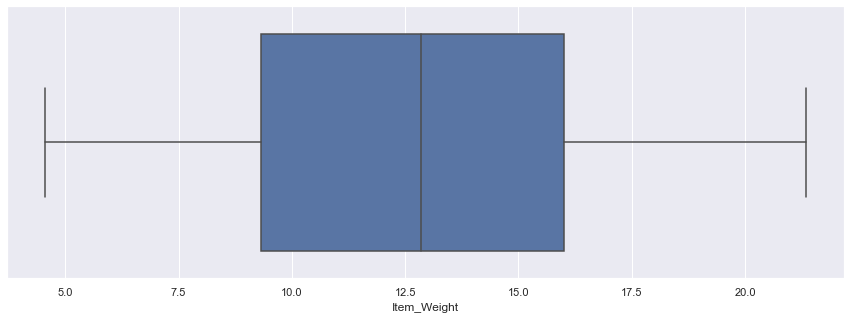

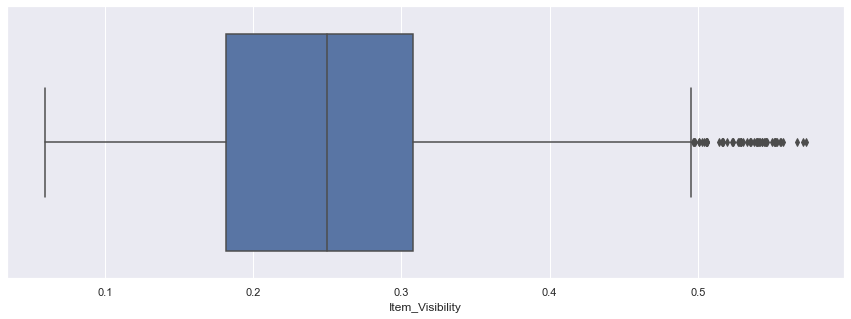

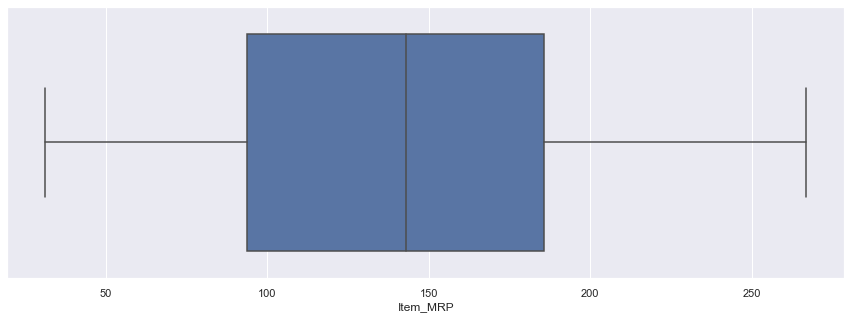

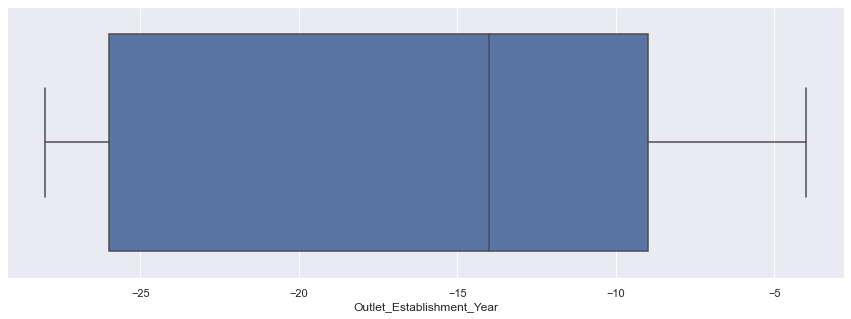

In [97]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

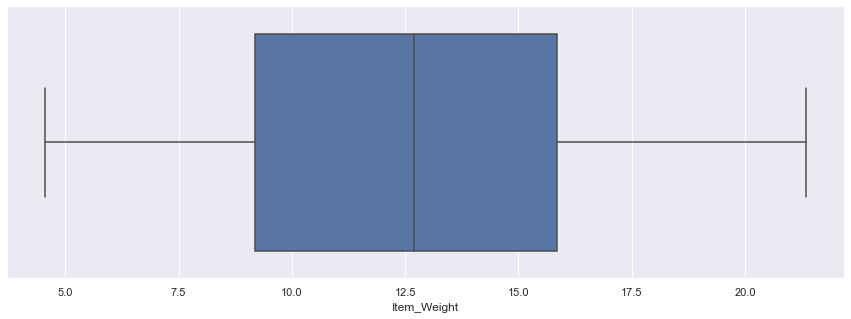

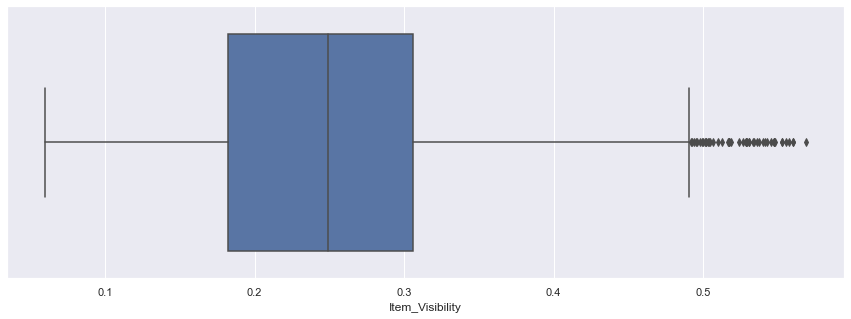

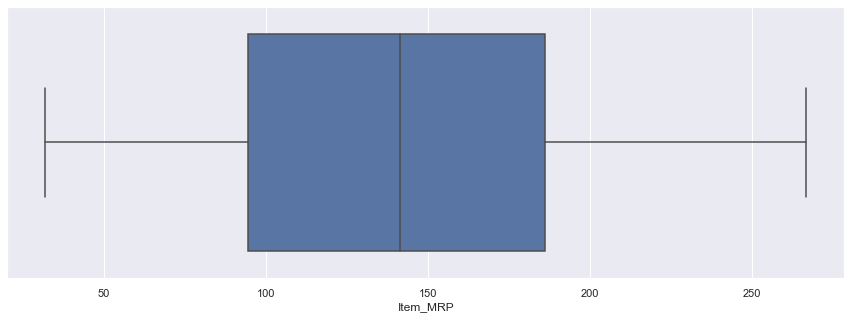

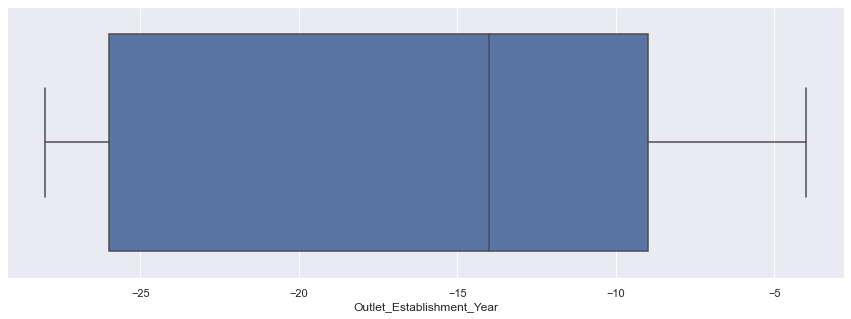

In [98]:
for i in columns:
    sns.boxplot(df_test[i])
    plt.show()


In [99]:
Object=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df[i]=le.fit_transform(df[i])

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df_test[i]=le.fit_transform(df_test[i])

In [102]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,Food,9.30,0,0.126678,4,249.8092,OUT049,-14,1,0,1,3735.1380,1,14
1,Drink,5.92,2,0.138846,14,48.2692,OUT018,-4,1,2,2,443.4228,0,4
2,Food,17.50,0,0.129461,10,141.6180,OUT049,-14,1,0,1,2097.2700,1,14
3,Food,19.20,2,0.257161,6,182.0950,OUT010,-15,2,2,0,732.3800,1,15
4,Non Consumable,8.93,1,0.257161,9,53.8614,OUT013,-26,0,2,1,994.7052,2,26


In [103]:
df=pd.get_dummies(df,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,Food,9.30,0.126678,4,249.8092,OUT049,-14,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,Drink,5.92,0.138846,14,48.2692,OUT018,-4,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,Food,17.50,0.129461,10,141.6180,OUT049,-14,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,Food,19.20,0.257161,6,182.0950,OUT010,-15,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,Non Consumable,8.93,0.257161,9,53.8614,OUT013,-26,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


In [104]:
df_test=pd.get_dummies(df_test,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,Food,20.750000,0.086976,13,107.8622,OUT049,-14,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,Food,8.300000,0.196030,4,87.3198,OUT017,-6,6,0,0,...,0,1,0,0,1,0,0,0,1,0
2,Non Consumable,14.600000,0.315555,11,241.7538,OUT010,-15,15,0,1,...,0,0,1,1,0,0,0,0,0,1
3,Food,7.315000,0.124050,13,155.0340,OUT017,-6,6,1,0,...,0,1,0,0,1,0,0,0,1,0
4,Food,12.695633,0.344383,4,234.2300,OUT027,-28,28,0,0,...,0,0,1,0,0,0,1,0,1,0


In [105]:
df.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.249580,7.226681,140.992782,-15.168133,2181.288914,15.168133,0.459697,0.187610,0.352693,...,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703,0.093746,0.718644,0.187610
std,4.226124,0.089018,4.209990,62.275067,8.371760,1706.499616,8.371760,0.498402,0.390423,0.477836,...,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538,0.291493,0.449687,0.390423
min,4.555000,0.059789,0.000000,31.290000,-28.000000,33.290000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.181894,4.000000,93.826500,-26.000000,834.247400,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.250033,6.000000,143.012800,-14.000000,1794.331000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.307547,10.000000,185.643700,-9.000000,3101.296400,26.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.573054,15.000000,266.888400,-4.000000,13086.964800,28.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000
mean,12.695633,0.249002,7.233410,141.023273,-15.171097,15.171097,0.454321,0.19134,0.354339,0.109312,...,0.280232,0.326703,0.393065,0.127090,0.654286,0.108784,0.109840,0.091181,0.717479,0.19134
std,4.245189,0.088117,4.219057,61.809091,8.372256,8.372256,0.497953,0.39339,0.478355,0.312057,...,0.449152,0.469049,0.488474,0.333103,0.475642,0.311395,0.312718,0.287892,0.450265,0.39339
min,4.555000,0.059928,0.000000,31.990000,-28.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.195000,0.182230,4.000000,94.412000,-26.000000,9.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,12.695633,0.249273,6.000000,141.415400,-14.000000,14.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,15.850000,0.305717,10.000000,186.026600,-9.000000,26.000000,1.000000,0.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,21.350000,0.568891,15.000000,266.588400,-4.000000,28.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [107]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,Food,9.30,0.126678,4,249.8092,OUT049,-14,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,Drink,5.92,0.138846,14,48.2692,OUT018,-4,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,Food,17.50,0.129461,10,141.6180,OUT049,-14,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,Food,19.20,0.257161,6,182.0950,OUT010,-15,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,Non Consumable,8.93,0.257161,9,53.8614,OUT013,-26,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


In [108]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,Food,20.750000,0.086976,13,107.8622,OUT049,-14,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,Food,8.300000,0.196030,4,87.3198,OUT017,-6,6,0,0,...,0,1,0,0,1,0,0,0,1,0
2,Non Consumable,14.600000,0.315555,11,241.7538,OUT010,-15,15,0,1,...,0,0,1,1,0,0,0,0,0,1
3,Food,7.315000,0.124050,13,155.0340,OUT017,-6,6,1,0,...,0,1,0,0,1,0,0,0,1,0
4,Food,12.695633,0.344383,4,234.2300,OUT027,-28,28,0,0,...,0,0,1,0,0,0,1,0,1,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Years               8523 non-null   int64  
 9   Item_Fat_Content_0         8523 non-null   uint8  
 10  Item_Fat_Content_1         8523 non-null   uint8  
 11  Item_Fat_Content_2         8523 non-null   uint8  
 12  Outlet_Size_0              8523 non-null   uint8  
 13  Outlet_Size_1              8523 non-null   uint8

# Correlation Matrix

<AxesSubplot:>

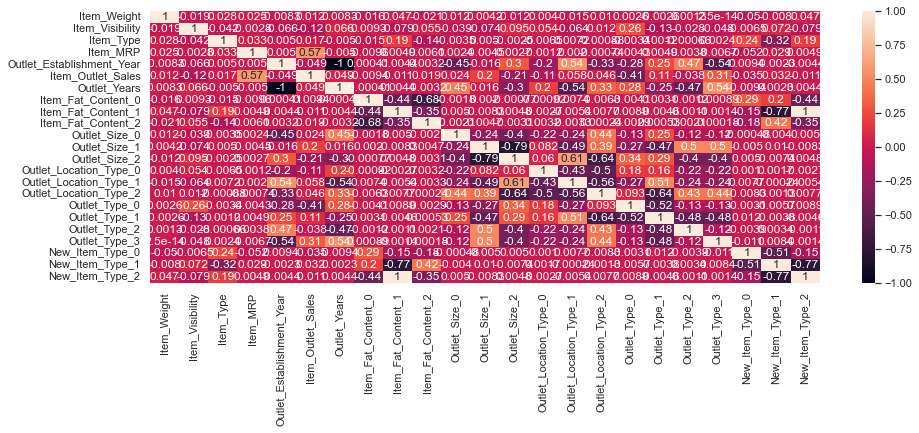

In [110]:
corr=df.corr()
sns.heatmap(corr,annot=True)

There is positive correlation between Item_MRP and Item_Outlet_Sales

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Years               8523 non-null   int64  
 9   Item_Fat_Content_0         8523 non-null   uint8  
 10  Item_Fat_Content_1         8523 non-null   uint8  
 11  Item_Fat_Content_2         8523 non-null   uint8  
 12  Outlet_Size_0              8523 non-null   uint8  
 13  Outlet_Size_1              8523 non-null   uint8

In [112]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,Food,9.30,0.126678,4,249.8092,OUT049,-14,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,Drink,5.92,0.138846,14,48.2692,OUT018,-4,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,Food,17.50,0.129461,10,141.6180,OUT049,-14,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,Food,19.20,0.257161,6,182.0950,OUT010,-15,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,Non Consumable,8.93,0.257161,9,53.8614,OUT013,-26,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


# Train - Test Split

In [113]:
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [114]:
x.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.249580,7.226681,140.992782,15.168133,0.459697,0.187610,0.352693,0.109351,0.327702,...,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703,0.093746,0.718644,0.187610
std,4.226124,0.089018,4.209990,62.275067,8.371760,0.498402,0.390423,0.477836,0.312098,0.469403,...,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538,0.291493,0.449687,0.390423
min,4.555000,0.059789,0.000000,31.290000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.181894,4.000000,93.826500,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.250033,6.000000,143.012800,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.307547,10.000000,185.643700,26.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.573054,15.000000,266.888400,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Training

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [116]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.56270958074306
At random state 0,the testing accuracy is: 0.5635567895120372


At random state 1,the training accuracy is: 0.5632185744821414
At random state 1,the testing accuracy is: 0.5603855378960801


At random state 2,the training accuracy is: 0.5672253907350191
At random state 2,the testing accuracy is: 0.5455842149944207


At random state 3,the training accuracy is: 0.554168427664973
At random state 3,the testing accuracy is: 0.5965912648787521


At random state 4,the training accuracy is: 0.5654849477824373
At random state 4,the testing accuracy is: 0.5505321195378361


At random state 5,the training accuracy is: 0.5654693413710521
At random state 5,the testing accuracy is: 0.5521602452076091


At random state 6,the training accuracy is: 0.566680356111615
At random state 6,the testing accuracy is: 0.5467451451892016


At random state 7,the training accuracy is: 0.5676868817650975
At random state 7,the testing accuracy is: 0.5449445

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=18)

In [118]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.4804822517365209
0.2652399426235178
0.18555517782720132


In [119]:
sv=SVR(kernel='linear')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,ab]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    print('Accuracy of', m )
    print('Training Score', train_score)
    print('Testing Score', test_score)
    print('\n')

Accuracy of LinearRegression()
Training Score 0.5654244836090394
Testing Score 0.5528316723016939


Accuracy of SVR(kernel='linear')
Training Score 0.4804822517365209
Testing Score 0.4628776382939481


Accuracy of DecisionTreeRegressor()
Training Score 1.0
Testing Score 0.1609351511119067


Accuracy of RandomForestRegressor()
Training Score 0.9374966480730842
Testing Score 0.5492939555954759


Accuracy of AdaBoostRegressor()
Training Score 0.48298063943023284
Testing Score 0.4645601807730676




Found LinearRegression is the best model to fit

# Cross Validation

In [120]:
from sklearn.model_selection import cross_val_score

model=(lr,sv,dt,rf,ab)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print('\n')

Mean Accuracy of  LinearRegression()
0.5606417806465654


Mean Accuracy of  SVR(kernel='linear')
0.47566427426001134


Mean Accuracy of  DecisionTreeRegressor()
0.15982097553704772


Mean Accuracy of  RandomForestRegressor()
0.5428081171851546


Mean Accuracy of  AdaBoostRegressor()
0.4930312827328427




# Normalization and Hypertuning

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [122]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5528395755010098

In [123]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5606427023493519

Found that there is not such difference after tuning

# Saving the Final Model

In [124]:
final_mod=LinearRegression(copy_X=True, fit_intercept= True, n_jobs=None, normalize=False)
final_mod.fit(x_train,y_train)
pred_final=final_mod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rf_score=cross_val_score(final_mod,x,y,cv=5)
rfc=rf_score.mean()
print('Cross Val score', rfc*100)

R2 Score 55.2831672301694
Cross Val score 56.064178064656545


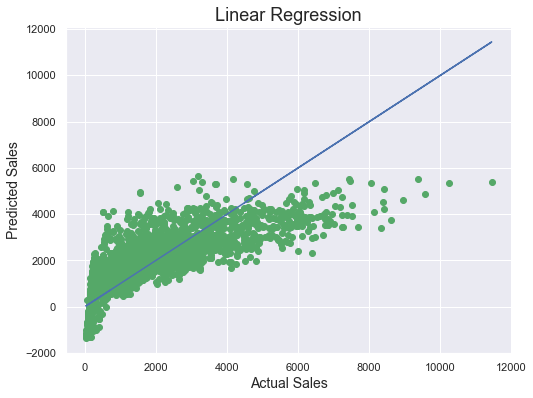

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [134]:
import joblib
joblib.dump(final_mod,'BigMart_sales.obj')

['BigMart_sales.obj']

In [135]:
load_model=joblib.load('BigMart_sales.obj')

In [136]:
x = df_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])

In [137]:
test_pred=load_model.predict(x)

In [138]:
pred_sales=pd.DataFrame(data=test_pred)

In [139]:
df_predict=df_test.join(pred_sales)
df_predict.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,0
0,Food,20.750000,0.086976,13,107.8622,OUT049,-14,14,1,0,...,0,0,0,1,0,0,0,1,0,1853.534772
1,Food,8.300000,0.196030,4,87.3198,OUT017,-6,6,0,0,...,1,0,0,1,0,0,0,1,0,1622.134406
2,Non Consumable,14.600000,0.315555,11,241.7538,OUT010,-15,15,0,1,...,0,1,1,0,0,0,0,0,1,1887.664430
3,Food,7.315000,0.124050,13,155.0340,OUT017,-6,6,1,0,...,1,0,0,1,0,0,0,1,0,2630.792410
4,Food,12.695633,0.344383,4,234.2300,OUT027,-28,28,0,0,...,0,1,0,0,0,1,0,1,0,5147.608303
